In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [2]:
from torchvision import datasets
data_path = 'data/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)

Files already downloaded and verified


In [3]:
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified


In [4]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [5]:
type(cifar10_val).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [6]:
# how many data points in each datasets?

In [7]:
len(cifar10)

50000

In [8]:
len(cifar10_val)

10000

In [9]:
# a pytorch Dataset is an object, it has two methods: __len__ (returns the no.of samples) and __getitem__ (return the items - consisting of samples and the corresponding labels). When a py object has a __len__ method, we can use len() on it, and indexing on it due to __getitem__

In [10]:
img, label = cifar10[99]

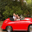

In [11]:
img

In [12]:
label

1

In [13]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
class_names[label]

'automobile'

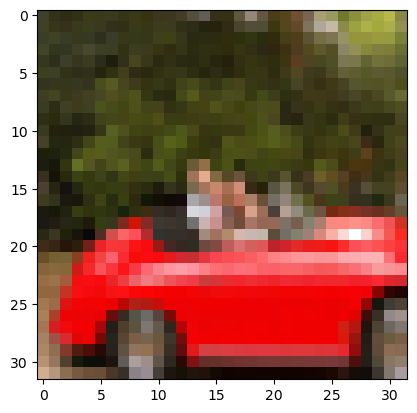

In [14]:
plt.imshow(img)
plt.show()

In [15]:
# now the data set consists of PIL images, and we want to convert these to torch tensors

In [16]:
# do this with torchvision transforms

In [17]:
from torchvision import transforms

In [18]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [19]:
# ToTensor is what we will use which will transform np arrays and PILs

In [20]:
# can we get the shape of the PIL image object? We can as below
np.array(img).shape

(32, 32, 3)

In [21]:
# but let's convert the image object to a tensor with torchvision transform

In [22]:
to_tensor = transforms.ToTensor()

In [23]:
img_t = to_tensor(img)

In [24]:
img_t.shape # of shape C*H*W

torch.Size([3, 32, 32])

In [25]:
# we can do the transforms in the downloading phase itself

In [26]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform = transforms.ToTensor())

In [27]:
img_t, label = tensor_cifar10[99]

In [28]:
type(img_t)

torch.Tensor

In [29]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [30]:
label

1

In [31]:
# totensor also converts all the images to a 0 to 1 range(before that it was 0 to 255)

In [32]:
img_t

tensor([[[0.2431, 0.1961, 0.1804,  ..., 0.6549, 0.7176, 0.5373],
         [0.2471, 0.2157, 0.2039,  ..., 0.6392, 0.6706, 0.5686],
         [0.2275, 0.2510, 0.2196,  ..., 0.6000, 0.5882, 0.4824],
         ...,
         [0.6745, 0.5608, 0.5098,  ..., 0.3686, 0.5529, 0.5451],
         [0.7176, 0.5882, 0.3137,  ..., 0.3176, 0.5294, 0.5608],
         [0.8196, 0.7137, 0.5451,  ..., 0.2314, 0.5098, 0.6627]],

        [[0.2510, 0.1961, 0.1725,  ..., 0.6745, 0.7216, 0.5333],
         [0.2549, 0.2078, 0.1961,  ..., 0.6627, 0.6824, 0.5725],
         [0.2431, 0.2588, 0.2353,  ..., 0.6078, 0.6039, 0.5020],
         ...,
         [0.5294, 0.4314, 0.2196,  ..., 0.2941, 0.4235, 0.4118],
         [0.5725, 0.4627, 0.2510,  ..., 0.2824, 0.4627, 0.4902],
         [0.6824, 0.5922, 0.4275,  ..., 0.2118, 0.4667, 0.6118]],

        [[0.1725, 0.1020, 0.0745,  ..., 0.2706, 0.2980, 0.2824],
         [0.1451, 0.1020, 0.1059,  ..., 0.2392, 0.2941, 0.3020],
         [0.1412, 0.1451, 0.1451,  ..., 0.2431, 0.2510, 0.

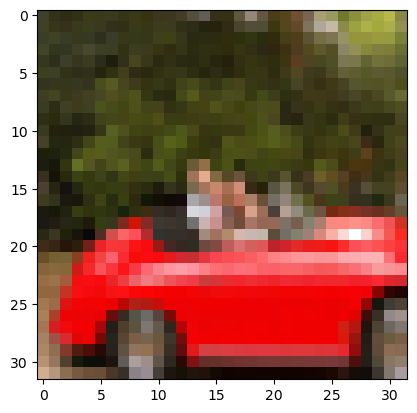

In [33]:
# verify it's the same image
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [34]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

In [35]:
# may also need to normalize for each channel

In [36]:
# This is a recommended step we might have ommitted this with the preprocessed data for the BPM, but we are using bettwe activations and best optimizers, so should make up for this stuff

In [37]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10 ], dim = 3)

In [38]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [39]:
# now we can compute the mean and std per channel

In [40]:
imgs.view(3,-1).shape

torch.Size([3, 51200000])

In [41]:
# mean for the three channels
imgs.view(3,-1).mean(dim = 1)

tensor([0.4914, 0.4822, 0.4465])

In [42]:
# std for the three channels
imgs.view(3,-1).std(dim = 1)

tensor([0.2470, 0.2435, 0.2616])

In [43]:
# now these can be used to normaize the images
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [44]:
# And this can be cncatenated in the ToTensor transform

In [45]:
transformed_cifar10 = datasets.CIFAR10(data_path, train = True, download = False, 
                                       transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))]))

In [46]:
len(transformed_cifar10)

50000

In [47]:
img_tn, _ = transformed_cifar10[99]

In [51]:
# img_tn

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9802876..2.1264887].


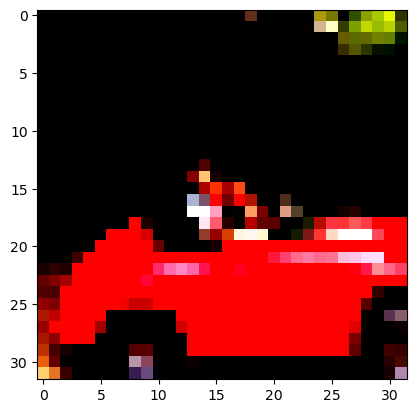

In [48]:
# now plot this, but it would not look the same
plt.imshow(img_tn.permute(1,2,0))
plt.show()

In [49]:
# for this task - differentiate birds from planes, we will subset data from our original data